In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import cv2

In [4]:
import os

In [5]:
import time

In [6]:
from matplotlib import pyplot as plt

In [7]:
from PIL import Image, ImageTk


In [8]:
import mediapipe as mp

In [9]:
from mediapipe.python.solutions import holistic as mp_holistic

In [10]:
from mediapipe.python.solutions.face_mesh import FACEMESH_TESSELATION

In [11]:
# Initialize MediaPipe holistic model
mp_holistic = mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Keypoints using mp holistic

In [12]:
mp_holistic = mp.solutions.holistic # holistic model # make out detection
mp_drawing = mp.solutions.drawing_utils # drawing utilities and actually draw them

In [13]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # color conversion
    image.flags.writeable = False      # image is not writeable here
    results = model.process(image)      # make prediction image is going to be our frames 
    image.flags.writeable =True           # images is writeable
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #color conversion
    return image,results

In [14]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, FACEMESH_TESSELATION)# face connection
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)# pose connection
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw left hand connection 
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw right hand connection

In [15]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),# color landmarks
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)
                             ) 

In [16]:
mp_holistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [22]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # read feed
        ret,frame = cap.read()
        #make detection
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        #Draw landmarks
        draw_styled_landmarks(image,results)
        #show to screen
        cv2.imshow("OpenCV Feed",image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [23]:
results

mediapipe.python.solution_base.SolutionOutputs

In [24]:
draw_landmarks(frame,results)

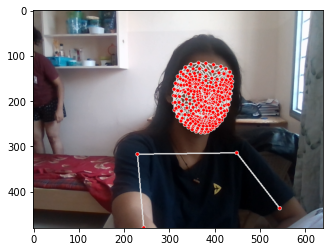

In [25]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# extracting keypoints values

In [26]:
results.face_landmarks

landmark {
  x: 0.5979791283607483
  y: 0.4798704981803894
  z: -0.024281086400151253
}
landmark {
  x: 0.605991542339325
  y: 0.4403369724750519
  z: -0.04306764155626297
}
landmark {
  x: 0.6009774208068848
  y: 0.4519864618778229
  z: -0.02288011834025383
}
landmark {
  x: 0.6017727851867676
  y: 0.3965989649295807
  z: -0.03333120048046112
}
landmark {
  x: 0.6081084609031677
  y: 0.42752957344055176
  z: -0.0457778163254261
}
landmark {
  x: 0.6091171503067017
  y: 0.410388320684433
  z: -0.04228631407022476
}
landmark {
  x: 0.609965443611145
  y: 0.3683137595653534
  z: -0.019425854086875916
}
landmark {
  x: 0.5437635779380798
  y: 0.34712234139442444
  z: 0.00027797408984042704
}
landmark {
  x: 0.6133164763450623
  y: 0.33253681659698486
  z: -0.013033350929617882
}
landmark {
  x: 0.6160801649093628
  y: 0.31427690386772156
  z: -0.014282342977821827
}
landmark {
  x: 0.6229043006896973
  y: 0.2509259581565857
  z: -0.004616388585418463
}
landmark {
  x: 0.5970699787139893
 

In [27]:
results.pose_landmarks

landmark {
  x: 0.5939587950706482
  y: 0.41996678709983826
  z: -0.7855035066604614
  visibility: 0.9995822310447693
}
landmark {
  x: 0.6240447759628296
  y: 0.3700818121433258
  z: -0.7129381895065308
  visibility: 0.9989323616027832
}
landmark {
  x: 0.6375449895858765
  y: 0.37372347712516785
  z: -0.7133568525314331
  visibility: 0.9987763166427612
}
landmark {
  x: 0.6508195400238037
  y: 0.3782128095626831
  z: -0.7131725549697876
  visibility: 0.9985422492027283
}
landmark {
  x: 0.5780482888221741
  y: 0.3582391142845154
  z: -0.7693488001823425
  visibility: 0.999332070350647
}
landmark {
  x: 0.5602583885192871
  y: 0.3533100485801697
  z: -0.769288182258606
  visibility: 0.9994274377822876
}
landmark {
  x: 0.5418771505355835
  y: 0.34930720925331116
  z: -0.7697534561157227
  visibility: 0.9994635581970215
}
landmark {
  x: 0.6541467905044556
  y: 0.40160462260246277
  z: -0.26620352268218994
  visibility: 0.9979736804962158
}
landmark {
  x: 0.4984895586967468
  y: 0.370

In [28]:
results.face_landmarks.landmark

[x: 0.5979791283607483
y: 0.4798704981803894
z: -0.024281086400151253
, x: 0.605991542339325
y: 0.4403369724750519
z: -0.04306764155626297
, x: 0.6009774208068848
y: 0.4519864618778229
z: -0.02288011834025383
, x: 0.6017727851867676
y: 0.3965989649295807
z: -0.03333120048046112
, x: 0.6081084609031677
y: 0.42752957344055176
z: -0.0457778163254261
, x: 0.6091171503067017
y: 0.410388320684433
z: -0.04228631407022476
, x: 0.609965443611145
y: 0.3683137595653534
z: -0.019425854086875916
, x: 0.5437635779380798
y: 0.34712234139442444
z: 0.00027797408984042704
, x: 0.6133164763450623
y: 0.33253681659698486
z: -0.013033350929617882
, x: 0.6160801649093628
y: 0.31427690386772156
z: -0.014282342977821827
, x: 0.6229043006896973
y: 0.2509259581565857
z: -0.004616388585418463
, x: 0.5970699787139893
y: 0.4859159290790558
z: -0.023184239864349365
, x: 0.5958266258239746
y: 0.49037402868270874
z: -0.020375123247504234
, x: 0.594651997089386
y: 0.49200189113616943
z: -0.016720617190003395
, x: 0.594

In [29]:
len(results.face_landmarks.landmark)

468

In [30]:
len(results.pose_landmarks.landmark)

33

In [31]:
results.pose_landmarks.landmark[0]  # the next cell is equivalent of doing these one by one 

x: 0.5939587950706482
y: 0.41996678709983826
z: -0.7855035066604614
visibility: 0.9995822310447693

In [32]:
# above all not needed are converted into the func
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(33*4)
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh= np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [33]:
result_test = extract_keypoints(results)

In [34]:
result_test

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
np.save("0",result_test)  # saving each frame as np array

In [36]:
np.load("0.npy")

array([0., 0., 0., ..., 0., 0., 0.])

# setup folder for collection

In [37]:
# path for our exported data ,numpy array
DATA_PATH = os.path.join("MP_Data")

#actions that we try to detect  # using 30 different frames to be able to detect a particular gestures
#3 different actions and 30 frames and the no. of sequence
actions = np.array(["hello","thanks","iloveyou"])
no_sequences = 30 ## think as 30 video worth of data
sequence_length = 30  # each video have 30 frame in length

In [38]:
#looping through it
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# Collecting keypoints values for training and testing

In [39]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# preprocessing data and create labels and features
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [41]:
label_map = {label:num for num,label in enumerate(actions)}

In [42]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [43]:
sequences,labels= [],[]
for action in actions:
    for sequence in range(no_sequences):
        window =[]
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [44]:
sequences

[[array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([ 0.        ,  0.        ,  0.        , ...,  0.08879629,
          0.54178572, -0.05521996]),
  array([ 0.        ,  0.        ,  0.        , ...,  0.37078404,
          0.3059783 , -0.03532307]),
  array([ 0.        ,  0.        ,  0.        , ...,  0.46339893,
          0.33771178, -0.03719599]),
  array([ 0.        ,  0.        ,  0.        , ...,  0.50033659,
          0.36121187, -0.

In [45]:
np.array(sequences).shape

(90, 30, 1662)

In [46]:
np.array(labels).shape

(90,)

In [47]:
x = np.array(sequences)

In [48]:
x

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.2526634 ,
          0.22015104, -0.05235623],
        [ 0.        ,  0.        ,  0.        , ...,  0.27058342,
          0.22678615, -0.05176069],
        [ 0.        ,  0.        ,  0.        , ...,  0.26850757,
          0.23058186, -0.0569149 ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.26925331,
          0.23201039, -0.05811432],
        [ 0.        ,  0.        ,  0.        , ...,  0.52051365,
          0.38503459, -0.03419623],
        [ 0.        ,  0.        ,  0.        , ...,  0.52666843,
          0.38575882, -0.03198861],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [49]:
y = to_categorical(labels).astype(int)

In [50]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05)

In [52]:
x_train.shape

(85, 30, 1662)

In [53]:
x_test.shape


(5, 30, 1662)

# buildand train lstm neural network

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [55]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [56]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [57]:
x.shape

(90, 30, 1662)

In [58]:
actions.shape[0]

3

In [59]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [60]:
model

In [61]:
model.fit(x_train,y_train,epochs=2000,callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 112ms/step - loss: 2.6886 - categorical_accuracy: 0.3529
Epoch 2/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.7645 - categorical_accuracy: 0.3529
Epoch 3/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.3779 - categorical_accuracy: 0.3529
Epoch 4/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.1427 - categorical_accuracy: 0.4118
Epoch 5/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.2999 - categorical_accuracy: 0.3882
Epoch 6/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.2361 - categorical_accuracy: 0.3294
Epoch 7/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.8985 - categorical_accuracy: 0.3529
Epoch 8/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.5766 - categorical_accuracy: 0.3529
Epoch 9/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.2207 - categorical_accuracy:

3/3 [==============================] - 0s 95ms/step - loss: 1.0853 - categorical_accuracy: 0.3176
Epoch 75/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0819 - categorical_accuracy: 0.3176
Epoch 76/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0768 - categorical_accuracy: 0.3176
Epoch 77/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0693 - categorical_accuracy: 0.3294
Epoch 78/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.0517 - categorical_accuracy: 0.3294
Epoch 79/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0143 - categorical_accuracy: 0.3529
Epoch 80/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.9188 - categorical_accuracy: 0.4118
Epoch 81/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.2970 - categorical_accuracy: 0.5176
Epoch 82/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0503 - categorical_accuracy: 0.3412
Epoch 

3/3 [==============================] - 0s 90ms/step - loss: 7.4317 - categorical_accuracy: 0.2471
Epoch 147/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.8720 - categorical_accuracy: 0.3647
Epoch 148/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.0418 - categorical_accuracy: 0.3294
Epoch 149/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.7091 - categorical_accuracy: 0.2941
Epoch 150/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.2445 - categorical_accuracy: 0.4000
Epoch 151/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.3379 - categorical_accuracy: 0.3647
Epoch 152/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1299 - categorical_accuracy: 0.3529
Epoch 153/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.2294 - categorical_accuracy: 0.3176
Epoch 154/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.2385 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 92ms/step - loss: 1.1374 - categorical_accuracy: 0.2471
Epoch 219/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.1161 - categorical_accuracy: 0.3176
Epoch 220/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.1275 - categorical_accuracy: 0.3059
Epoch 221/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.1000 - categorical_accuracy: 0.3059
Epoch 222/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.1061 - categorical_accuracy: 0.2824
Epoch 223/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1034 - categorical_accuracy: 0.3412
Epoch 224/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.1086 - categorical_accuracy: 0.2353
Epoch 225/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0992 - categorical_accuracy: 0.3529
Epoch 226/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.1169 - categorical_accuracy: 0.352

3/3 [==============================] - 0s 100ms/step - loss: 1.1137 - categorical_accuracy: 0.3294
Epoch 291/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0970 - categorical_accuracy: 0.3765
Epoch 292/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1104 - categorical_accuracy: 0.3529
Epoch 293/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1069 - categorical_accuracy: 0.2941
Epoch 294/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1086 - categorical_accuracy: 0.3294
Epoch 295/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1055 - categorical_accuracy: 0.3529
Epoch 296/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1126 - categorical_accuracy: 0.3529
Epoch 297/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1205 - categorical_accuracy: 0.3294
Epoch 298/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1133 - categorical_accuracy: 0.31

3/3 [==============================] - 0s 93ms/step - loss: 1.0978 - categorical_accuracy: 0.3529
Epoch 363/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1022 - categorical_accuracy: 0.3529
Epoch 364/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0970 - categorical_accuracy: 0.3647
Epoch 365/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1091 - categorical_accuracy: 0.3647
Epoch 366/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1007 - categorical_accuracy: 0.3412
Epoch 367/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0979 - categorical_accuracy: 0.3176
Epoch 368/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0990 - categorical_accuracy: 0.3529
Epoch 369/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1007 - categorical_accuracy: 0.3529
Epoch 370/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0970 - categorical_accuracy: 0.352

3/3 [==============================] - 0s 94ms/step - loss: 1.0978 - categorical_accuracy: 0.3529
Epoch 435/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1046 - categorical_accuracy: 0.3647
Epoch 436/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1013 - categorical_accuracy: 0.3529
Epoch 437/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1014 - categorical_accuracy: 0.3294
Epoch 438/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0964 - categorical_accuracy: 0.3529
Epoch 439/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1002 - categorical_accuracy: 0.3529
Epoch 440/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1009 - categorical_accuracy: 0.3529
Epoch 441/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1034 - categorical_accuracy: 0.2941
Epoch 442/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1004 - categorical_accuracy: 0.317

3/3 [==============================] - 0s 94ms/step - loss: 1.1064 - categorical_accuracy: 0.3529
Epoch 507/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0950 - categorical_accuracy: 0.3529
Epoch 508/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0965 - categorical_accuracy: 0.4353
Epoch 509/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1010 - categorical_accuracy: 0.3294
Epoch 510/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0996 - categorical_accuracy: 0.3176
Epoch 511/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1041 - categorical_accuracy: 0.2824
Epoch 512/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0995 - categorical_accuracy: 0.3294
Epoch 513/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0964 - categorical_accuracy: 0.3529
Epoch 514/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1006 - categorical_accuracy: 0.352

3/3 [==============================] - 0s 96ms/step - loss: 1.1095 - categorical_accuracy: 0.3294
Epoch 579/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1113 - categorical_accuracy: 0.3529
Epoch 580/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1012 - categorical_accuracy: 0.3529
Epoch 581/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0954 - categorical_accuracy: 0.3529
Epoch 582/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0968 - categorical_accuracy: 0.3412
Epoch 583/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.1021 - categorical_accuracy: 0.3294
Epoch 584/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0970 - categorical_accuracy: 0.3529
Epoch 585/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0981 - categorical_accuracy: 0.3529
Epoch 586/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0978 - categorical_accuracy: 0.35

3/3 [==============================] - 0s 95ms/step - loss: 1.1111 - categorical_accuracy: 0.3294
Epoch 651/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0984 - categorical_accuracy: 0.3647
Epoch 652/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1095 - categorical_accuracy: 0.3529
Epoch 653/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1030 - categorical_accuracy: 0.3529
Epoch 654/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0949 - categorical_accuracy: 0.3529
Epoch 655/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.1072 - categorical_accuracy: 0.2353
Epoch 656/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0999 - categorical_accuracy: 0.3529
Epoch 657/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0975 - categorical_accuracy: 0.3529
Epoch 658/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0984 - categorical_accuracy: 0.35

3/3 [==============================] - 0s 98ms/step - loss: 1.0969 - categorical_accuracy: 0.3294
Epoch 723/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0942 - categorical_accuracy: 0.3529
Epoch 724/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1002 - categorical_accuracy: 0.3765
Epoch 725/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0971 - categorical_accuracy: 0.4118
Epoch 726/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0951 - categorical_accuracy: 0.3529
Epoch 727/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0986 - categorical_accuracy: 0.3529
Epoch 728/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0967 - categorical_accuracy: 0.3529
Epoch 729/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1038 - categorical_accuracy: 0.3529
Epoch 730/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0972 - categorical_accuracy: 0.35

3/3 [==============================] - 0s 96ms/step - loss: 1.0953 - categorical_accuracy: 0.3294
Epoch 795/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0968 - categorical_accuracy: 0.3294
Epoch 796/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0950 - categorical_accuracy: 0.3412
Epoch 797/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0942 - categorical_accuracy: 0.3647
Epoch 798/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0973 - categorical_accuracy: 0.3529
Epoch 799/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0943 - categorical_accuracy: 0.3529
Epoch 800/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0902 - categorical_accuracy: 0.3529
Epoch 801/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0969 - categorical_accuracy: 0.3059
Epoch 802/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0971 - categorical_accuracy: 0.317

3/3 [==============================] - 0s 101ms/step - loss: 1.0928 - categorical_accuracy: 0.3529
Epoch 867/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1022 - categorical_accuracy: 0.2824
Epoch 868/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0919 - categorical_accuracy: 0.3647
Epoch 869/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0861 - categorical_accuracy: 0.3529
Epoch 870/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0976 - categorical_accuracy: 0.3529
Epoch 871/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
Epoch 872/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0947 - categorical_accuracy: 0.3176
Epoch 873/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0976 - categorical_accuracy: 0.3294
Epoch 874/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0957 - categorical_accuracy: 0.35

3/3 [==============================] - 0s 100ms/step - loss: 1.0909 - categorical_accuracy: 0.3882
Epoch 939/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0934 - categorical_accuracy: 0.3412
Epoch 940/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0929 - categorical_accuracy: 0.3529
Epoch 941/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0917 - categorical_accuracy: 0.3882
Epoch 942/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0900 - categorical_accuracy: 0.3765
Epoch 943/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0915 - categorical_accuracy: 0.3765
Epoch 944/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.0891 - categorical_accuracy: 0.3529
Epoch 945/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0918 - categorical_accuracy: 0.3529
Epoch 946/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0897 - categorical_accuracy:

3/3 [==============================] - 0s 95ms/step - loss: 1.0910 - categorical_accuracy: 0.3529
Epoch 1011/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0913 - categorical_accuracy: 0.3529
Epoch 1012/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0873 - categorical_accuracy: 0.3647
Epoch 1013/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0891 - categorical_accuracy: 0.4471
Epoch 1014/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0890 - categorical_accuracy: 0.4235
Epoch 1015/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0887 - categorical_accuracy: 0.3882
Epoch 1016/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0880 - categorical_accuracy: 0.3882
Epoch 1017/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0864 - categorical_accuracy: 0.3529
Epoch 1018/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1051 - categorical_accura

Epoch 1082/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0867 - categorical_accuracy: 0.4118
Epoch 1083/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0880 - categorical_accuracy: 0.3412
Epoch 1084/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0797 - categorical_accuracy: 0.4588
Epoch 1085/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0828 - categorical_accuracy: 0.4588
Epoch 1086/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1047 - categorical_accuracy: 0.3529
Epoch 1087/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0887 - categorical_accuracy: 0.3529
Epoch 1088/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1052 - categorical_accuracy: 0.2471
Epoch 1089/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0985 - categorical_accuracy: 0.3176
Epoch 1090/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0879 - cat

3/3 [==============================] - 0s 97ms/step - loss: 1.0859 - categorical_accuracy: 0.3529
Epoch 1154/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0841 - categorical_accuracy: 0.3412
Epoch 1155/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0852 - categorical_accuracy: 0.4000
Epoch 1156/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0801 - categorical_accuracy: 0.3647
Epoch 1157/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0831 - categorical_accuracy: 0.3647
Epoch 1158/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0830 - categorical_accuracy: 0.4000
Epoch 1159/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0820 - categorical_accuracy: 0.4000
Epoch 1160/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0816 - categorical_accuracy: 0.4588
Epoch 1161/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0819 - categorical_accurac

3/3 [==============================] - 0s 94ms/step - loss: 1.0623 - categorical_accuracy: 0.3647
Epoch 1225/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0782 - categorical_accuracy: 0.3882
Epoch 1226/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0478 - categorical_accuracy: 0.3412
Epoch 1227/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0595 - categorical_accuracy: 0.3882
Epoch 1228/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0691 - categorical_accuracy: 0.4235
Epoch 1229/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0652 - categorical_accuracy: 0.3765
Epoch 1230/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0727 - categorical_accuracy: 0.3882
Epoch 1231/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0612 - categorical_accuracy: 0.3176
Epoch 1232/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0930 - categorical_accura

Epoch 1296/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0395 - categorical_accuracy: 0.4706
Epoch 1297/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0388 - categorical_accuracy: 0.4471
Epoch 1298/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0221 - categorical_accuracy: 0.3765
Epoch 1299/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0576 - categorical_accuracy: 0.4235
Epoch 1300/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0149 - categorical_accuracy: 0.4824
Epoch 1301/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0346 - categorical_accuracy: 0.4353
Epoch 1302/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0999 - categorical_accuracy: 0.4000
Epoch 1303/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0613 - categorical_accuracy: 0.3765
Epoch 1304/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0522 - 

3/3 [==============================] - 0s 95ms/step - loss: 1.0335 - categorical_accuracy: 0.5176
Epoch 1368/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0281 - categorical_accuracy: 0.4588
Epoch 1369/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.9998 - categorical_accuracy: 0.5412
Epoch 1370/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0203 - categorical_accuracy: 0.4471
Epoch 1371/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0039 - categorical_accuracy: 0.5294
Epoch 1372/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0109 - categorical_accuracy: 0.4471
Epoch 1373/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0310 - categorical_accuracy: 0.4824
Epoch 1374/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.9932 - categorical_accuracy: 0.4118
Epoch 1375/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.9845 - categorical_accurac

3/3 [==============================] - 0s 94ms/step - loss: 1.0921 - categorical_accuracy: 0.3412
Epoch 1439/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0857 - categorical_accuracy: 0.3529
Epoch 1440/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0902 - categorical_accuracy: 0.4000
Epoch 1441/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0931 - categorical_accuracy: 0.4235
Epoch 1442/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0875 - categorical_accuracy: 0.4706
Epoch 1443/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0882 - categorical_accuracy: 0.3294
Epoch 1444/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0889 - categorical_accuracy: 0.3294
Epoch 1445/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0877 - categorical_accuracy: 0.3294
Epoch 1446/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0878 - categorical_accurac

3/3 [==============================] - 0s 100ms/step - loss: 1.0826 - categorical_accuracy: 0.4000
Epoch 1510/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0844 - categorical_accuracy: 0.3412
Epoch 1511/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0822 - categorical_accuracy: 0.3647
Epoch 1512/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0828 - categorical_accuracy: 0.4235
Epoch 1513/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0831 - categorical_accuracy: 0.4588
Epoch 1514/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0826 - categorical_accuracy: 0.4353
Epoch 1515/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0821 - categorical_accuracy: 0.3765
Epoch 1516/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0830 - categorical_accuracy: 0.3412
Epoch 1517/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0817 - categorical_a

3/3 [==============================] - 0s 94ms/step - loss: 1.1224 - categorical_accuracy: 0.2941
Epoch 1581/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1054 - categorical_accuracy: 0.4118
Epoch 1582/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.1319 - categorical_accuracy: 0.2941
Epoch 1583/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0897 - categorical_accuracy: 0.3647
Epoch 1584/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0893 - categorical_accuracy: 0.3294
Epoch 1585/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.1390 - categorical_accuracy: 0.3529
Epoch 1586/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0651 - categorical_accuracy: 0.4588
Epoch 1587/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.1526 - categorical_accuracy: 0.3294
Epoch 1588/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1343 - categorical_accurac

3/3 [==============================] - 0s 98ms/step - loss: 1.0680 - categorical_accuracy: 0.4000
Epoch 1652/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0727 - categorical_accuracy: 0.3529
Epoch 1653/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0674 - categorical_accuracy: 0.4118
Epoch 1654/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0647 - categorical_accuracy: 0.4118
Epoch 1655/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0656 - categorical_accuracy: 0.4471
Epoch 1656/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0708 - categorical_accuracy: 0.4471
Epoch 1657/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0656 - categorical_accuracy: 0.4353
Epoch 1658/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0658 - categorical_accuracy: 0.5412
Epoch 1659/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0615 - categorical_accurac

Epoch 1723/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0290 - categorical_accuracy: 0.4588
Epoch 1724/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0391 - categorical_accuracy: 0.4941
Epoch 1725/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0346 - categorical_accuracy: 0.4118
Epoch 1726/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0311 - categorical_accuracy: 0.4824
Epoch 1727/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0204 - categorical_accuracy: 0.4824
Epoch 1728/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0369 - categorical_accuracy: 0.4000
Epoch 1729/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0349 - categorical_accuracy: 0.4353
Epoch 1730/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0634 - categorical_accuracy: 0.3647
Epoch 1731/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0363 - c

3/3 [==============================] - 0s 93ms/step - loss: 1.1230 - categorical_accuracy: 0.3294
Epoch 1795/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.1098 - categorical_accuracy: 0.3176
Epoch 1796/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0910 - categorical_accuracy: 0.3647
Epoch 1797/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.2982 - categorical_accuracy: 0.3059
Epoch 1798/2000
3/3 [==============================] - 0s 95ms/step - loss: 73108.7812 - categorical_accuracy: 0.2588
Epoch 1799/2000
3/3 [==============================] - 0s 94ms/step - loss: 2054.7583 - categorical_accuracy: 0.3529
Epoch 1800/2000
3/3 [==============================] - 0s 95ms/step - loss: 5587.3447 - categorical_accuracy: 0.3882
Epoch 1801/2000
3/3 [==============================] - 0s 94ms/step - loss: 1836.4583 - categorical_accuracy: 0.2706
Epoch 1802/2000
3/3 [==============================] - 0s 95ms/step - loss: 667.5321 - cate

3/3 [==============================] - 0s 95ms/step - loss: 1.7520 - categorical_accuracy: 0.3294
Epoch 1866/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.5147 - categorical_accuracy: 0.3647
Epoch 1867/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.4165 - categorical_accuracy: 0.2941
Epoch 1868/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.2412 - categorical_accuracy: 0.3176
Epoch 1869/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.2072 - categorical_accuracy: 0.3059
Epoch 1870/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.2599 - categorical_accuracy: 0.3176
Epoch 1871/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1484 - categorical_accuracy: 0.3176
Epoch 1872/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1418 - categorical_accuracy: 0.3294
Epoch 1873/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1978 - categorical_accurac

3/3 [==============================] - 0s 103ms/step - loss: 1.1111 - categorical_accuracy: 0.3294
Epoch 1937/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.1109 - categorical_accuracy: 0.3294
Epoch 1938/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1108 - categorical_accuracy: 0.3294
Epoch 1939/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.1107 - categorical_accuracy: 0.3294
Epoch 1940/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.1105 - categorical_accuracy: 0.3294
Epoch 1941/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.1104 - categorical_accuracy: 0.3294
Epoch 1942/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.1102 - categorical_accuracy: 0.3294
Epoch 1943/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.1101 - categorical_accuracy: 0.3294
Epoch 1944/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1100 - categorical_

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# Make predictions

In [63]:
res=model.predict(x_test)

1/1 [==============================] - 1s 658ms/step


In [64]:
len(res)

5

In [65]:
np.sum(res[0])

0.99999994

In [66]:
actions[np.argmax(res[1])]

'thanks'

In [67]:
y_test

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [68]:
actions[np.argmax(y_test[1])]

'hello'

In [69]:
model.save('action.hs')

INFO:tensorflow:Assets written to: action.hs\assets


In [70]:
model.load_weights('action.hs')

In [71]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [72]:
yhat = model.predict(x_train)

3/3 [==============================] - 0s 43ms/step


In [73]:
ytrue = np.argmax(y_train,axis=1).tolist()
yhat = np.argmax(yhat,axis=1).tolist()

In [74]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[58,  0],
        [27,  0]],

       [[ 0, 57],
        [ 0, 28]],

       [[55,  0],
        [30,  0]]], dtype=int64)

In [75]:
accuracy_score(ytrue,yhat)

0.32941176470588235

# test in real time

In [76]:
from scipy import stats

In [77]:
actions

array(['hello', 'thanks', 'iloveyou'], dtype='<U8')

In [78]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        print(num)
    return output_frame

In [79]:
res

array([[0.34719098, 0.3536989 , 0.29911005],
       [0.34719098, 0.3536989 , 0.29911005],
       [0.34719098, 0.3536989 , 0.29911005],
       [0.34719098, 0.3536989 , 0.29911005],
       [0.34719098, 0.3536989 , 0.29911008]], dtype=float32)

In [80]:
colors

[(245, 117, 16), (117, 245, 16), (16, 117, 245)]

In [87]:
# working perfectly fine
import tkinter as tk
from gtts import gTTS
import os
import cv2
import numpy as np
import mediapipe as mp
from googletrans import Translator
import time

# Function for converting text to speech
def text_to_speech(text, lang='en'):
    tts = gTTS(text=text, lang=lang)
    tts.save("output.mp3")
    os.system("start output.mp3")  # Play the generated audio file
    time.sleep(1)  # Add a pause of 1 second after playing the audio

# Function for translating text
def translate_text(text, target_lang='en'):
    translator = Translator()
    translation = translator.translate(text, dest=target_lang)
    return translation.text

# Function to clear the sentence
def clear_sentence():
    global sentence
    sentence = []
    label.config(text='')

# Function to convert detected gesture to speech
def convert_to_speech():
    global sentence
    if sentence:
        message = ' '.join(sentence)
        lang_preference = language.get()
        if lang_preference == 'Hindi':
            translated_text = translate_text(message, target_lang='hi')
            text_to_speech(translated_text, lang='hi')
        elif lang_preference == 'Kannada':
            translated_text = translate_text(message, target_lang='kn')
            text_to_speech(translated_text, lang='kn')
        elif lang_preference == 'Telugu':
            translated_text = translate_text(message, target_lang='te')
            text_to_speech(translated_text, lang='te')
        elif lang_preference == 'Bengali':
            translated_text = translate_text(message, target_lang='bn')
            text_to_speech(translated_text, lang='bn')
        elif lang_preference == 'Assamese':
            translated_text = translate_text(message, target_lang='as')
            text_to_speech(translated_text, lang='as')
        else:
            text_to_speech(message)

# Set up video capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Unable to open video capture.")
    exit()

# Set up MediaPipe holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
consistent_frames = 5  # Number of consecutive frames the gesture should be recognized for

# New variable to track the last displayed gesture
last_displayed_gesture = None

# Function to detect and process gestures
def detect_and_process_gestures():
    global sequence, sentence, predictions, last_displayed_gesture

    # Make detections
    _, frame = cap.read()
    image, results = mediapipe_detection(frame, holistic)
    
    # Draw landmarks
    draw_styled_landmarks(image, results)
    
    # Prediction logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]
    
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        predictions.append(np.argmax(res))
        
        # Check for consistency in predictions
        if len(predictions) >= consistent_frames:
            if len(set(predictions[-consistent_frames:])) == 1:
                # Gesture detected consistently for 'consistent_frames' frames
                if np.max(res) > threshold:
                    detected_action = actions[np.argmax(res)]
                    if detected_action != last_displayed_gesture:
                        # Display only if the detected gesture is different from the last displayed gesture
                        if detected_action not in sentence:
                            # Clear previous sentences if a new gesture is detected
                            sentence = []
                        sentence.append(detected_action)
                        # Update label text
                        label.config(text=' '.join(sentence))
                        # Update the last displayed gesture
                        last_displayed_gesture = detected_action
    
        if len(sentence) > 5: 
            sentence = sentence[-5:]
        
        # Viz probabilities
        image = prob_viz(res, actions, image, colors)
    
    # Display the frame
    cv2image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    img = Image.fromarray(cv2image)
    imgtk = ImageTk.PhotoImage(image=img)
    panel.imgtk = imgtk
    panel.config(image=imgtk)
    panel.after(10, detect_and_process_gestures)

# Create GUI
root = tk.Tk()
root.title("Gesture to Speech")

# Create a frame for buttons
button_frame = tk.Frame(root)
button_frame.pack(pady=20)

# Button for speech conversion
speech_button = tk.Button(button_frame, text="Convert to Speech", command=convert_to_speech)
speech_button.grid(row=0, column=0, padx=10)

# Button for language selection
language_label = tk.Label(button_frame, text="Select Language:")
language_label.grid(row=0, column=1, padx=10)

language = tk.StringVar(value="English")
language_menu = tk.OptionMenu(button_frame, language, "English", "Hindi","Kannada","Telugu","Bengali","Assamese")
language_menu.grid(row=0, column=2, padx=10)

# Button for clearing the sentence
clear_button = tk.Button(button_frame, text="Clear Sentence", command=clear_sentence)
clear_button.grid(row=0, column=3, padx=10)

# Create a label to display the detected gestures
label = tk.Label(root, text="", font=("Arial", 14))
label.pack(pady=20)

# Create a panel to display the video feed
panel = tk.Label(root)
panel.pack(padx=10, pady=10)

# Start gesture detection and processing
detect_and_process_gestures()

# Run the Tkinter event loop
root.mainloop()


1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 32ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 31ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 53ms/step
thanks
0
1
2
1/1 [==============================] - 0s 48ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 32ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 48ms/step
thanks
0
1
2
1/1 [==============================] - 0s 30ms/step
thanks
0
1
2
1/1 [==============================] - 0s 31ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 49ms/step
thanks
0
1
2
1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 49ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 32ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 46ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 35ms/step
thanks
0
1
2
1/1 [==============================] - 0s 32ms/step
thanks
0
1
2
1/1 [==============================] - 0s 35ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 35ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 46ms/step
thanks
0
1
2
1/1 [==============================] - 0s 48ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 49ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 48ms/step
thanks
0
1
2
1/1 [==============================] - 0s 49ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 32ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 46ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 46ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 46ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 31ms/step
thanks
0
1
2
1/1 [==============================] - 0s 48ms/step
thanks
0
1
2
1/1 [==============================] - 0s 32ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 32ms/step
thanks
0
1
2
1/1 [==============================] - 0s 51ms/step
thanks
0
1
2
1/1 [==============================] - 0s 46ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 46ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 48ms/step
thanks
0
1
2
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
1/1 [==============================] - 0s 32ms/step
thanks
0
1
2
1/1 [==============================] - 0s 46ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 55ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 46ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 52ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 35ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 48ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [==============================] - 0s 46ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [==============================] - 0s 35ms/step
thanks
0
1
2
1/1 [==============================] - 0s 31ms/step
thanks
0
1
2
1/1 [==============================] - 0s 31ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 51ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 32ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
1/1 [==============================] - 0s 48ms/step
thanks
0
1
2
1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 49ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 32ms/step
thanks
0
1
2
1/1 [==============================] - 0s 31ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 31ms/step
thanks
0
1
2
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [==============================] - 0s 35ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 46ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 31ms/step
thanks
0
1
2
1/1 [==============================] - 0s 31ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [==============================] - 0s 35ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 35ms/step
thanks
0
1
2
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
1/1 [==============================] - 0s 54ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 49ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 48ms/step
thanks
0
1
2
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
1/1 [==============================] - 0s 52ms/step
thanks
0
1
2
1/1 [==============================] - 0s 50ms/step
thanks
0
1
2
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 32ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [==============================] - 0s 48ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 31ms/step
thanks
0
1
2
1/1 [==============================] - 0s 32ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 31ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [==============================] - 0s 53ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
1/1 [==============================] - 0s 31ms/step
thanks
0
1
2
1/1 [==============================] - 0s 50ms/step
thanks
0
1
2
1/1 [==============================] - 0s 35ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 48ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 35ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 38ms/step
thanks
0
1
2
1/1 [==============================] - 0s 50ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 43ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 50ms/step
thanks
0
1
2
1/1 [==============================] - 0s 49ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 40ms/step
thanks
0
1
2
1/1 [==============================] - 0s 51ms/step
thanks
0
1
2
1/1 [==============================] - 0s 47ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 55ms/step
thanks
0
1
2
1/1 [==============================] - 0s 34ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 39ms/step
thanks
0
1
2
1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [====================

1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 46ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 48ms/step
thanks
0
1
2
1/1 [==============================] - 0s 37ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 45ms/step
thanks
0
1
2
1/1 [==============================] - 0s 41ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [==============================] - 0s 42ms/step
thanks
0
1
2
1/1 [==============================] - 0s 44ms/step
thanks
0
1
2
1/1 [==============================] - 0s 33ms/step
thanks
0
1
2
1/1 [==============================] - 0s 35ms/step
thanks
0
1
2
1/1 [==============================] - 0s 31ms/step
thanks
0
1
2
1/1 [==============================] - 0s 36ms/step
thanks
0
1
2
1/1 [====================

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Thingbaijam Celina\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Thingbaijam Celina\anaconda3\lib\tkinter\__init__.py", line 814, in callit
    func(*args)
  File "C:\Users\Thingbaijam Celina\AppData\Local\Temp\ipykernel_39840\1991578184.py", line 81, in detect_and_process_gestures
    image, results = mediapipe_detection(frame, holistic)
  File "C:\Users\Thingbaijam Celina\AppData\Local\Temp\ipykernel_39840\900058918.py", line 2, in mediapipe_detection
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # color conversion
cv2.error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

